## Tugas Besar 1 
### MK Visualisasi Data Gasal 2020/2021

<b>Nama<b>: Rizki Amanullah Hakim <br> 
<b>NIM<b>: 1301180522

#### Aturan umum:
1. Setiap soal dievaluasi berdasarkan _code program_ dan penjelasan yang dibuat.
2. File _midterm project_ yang telah dikerjakan harus di-submit melalui LMS.
3. Batas akhir submit file adalah 1 November 2020 pukul 21:00.
4. <b><font color='red'>Setiap tindakan plagiarism akan berakibat pada ketidaklulusan pada MK ini.</font><b>

### Kasus 1: Pima Indian Diabetes Data Set (Soal 1 - 2)
Dataset ini berasal dari the National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari pengumpulan dataset ini untuk dapat memprediksi secara diagnosis apakah seseorang mengidap penyakit diabetes atau tidak berdasarkan beberapa pengukuran diagnostik. Seluruh pasien pada dataset ini adalah perempuan keturunan India Pima yang berumur kurang dari 21 tahun.<br><br>
Dataset terdiri dari beberapa variabel prediktor medis dan satu variabel target sebagai _outcome_. Variabel prediktor di antaranya jumlah kehamilan, BMI, level insulin, usia, dll.lin level, age, and so on. Dataset dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/3i3gfr8pih4jwd4/diabetes.csv?dl=0)

### Soal 1 (15 poin)
Tampilkan visualisasi distribusi data untuk variabel "Glucose" dan "Insulin", lalu jelaskan hasil distribusinya.

#### Code

Distribusi Glucose
Mean: 120.89453125
Median: 117.0


<AxesSubplot:>

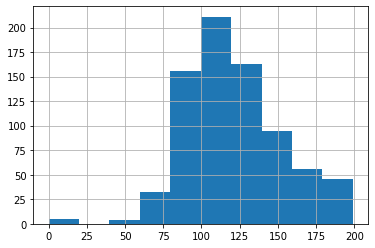

In [1]:
# type your code here
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import statistics

df = pd.read_csv('diabetes.csv')
df = df[['Glucose','Insulin']]

print('Distribusi Glucose')
print('Mean:',df['Glucose'].mean())
print('Median:',df['Glucose'].median())
df['Glucose'].hist()

Distribusi Insulin
Mean: 79.79947916666667
Median: 30.5


<AxesSubplot:>

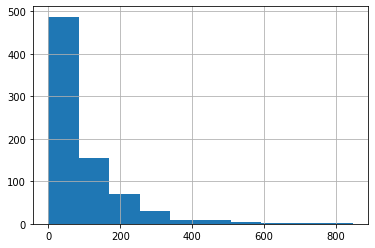

In [2]:
print('Distribusi Insulin')
print('Mean:',df['Insulin'].mean())
print('Median:',df['Insulin'].median())
df['Insulin'].hist()

#### Penjelasan

Dari histogram yang digenerate. Bila dilakukan analisa secara univariate, 
data distribusi yang dibentuk oleh kolom Glucose dan Insulin memiliki central tendency skew ke kanan
(positively skewed), dimana data terkonsentrasi dibawah rata-rata sedangkan outliernya berada
pada data diatas rata-rata. Menunjukkan bahwa nilai mean lebih besar dari mediannya. 


### Soal 2 (25 poin)
Tampilkan visualisasi dari korelasi (i) antar variabel dan (ii) antara variabel dan target, lalu jelaskan hasil korelasinya.

#### Code

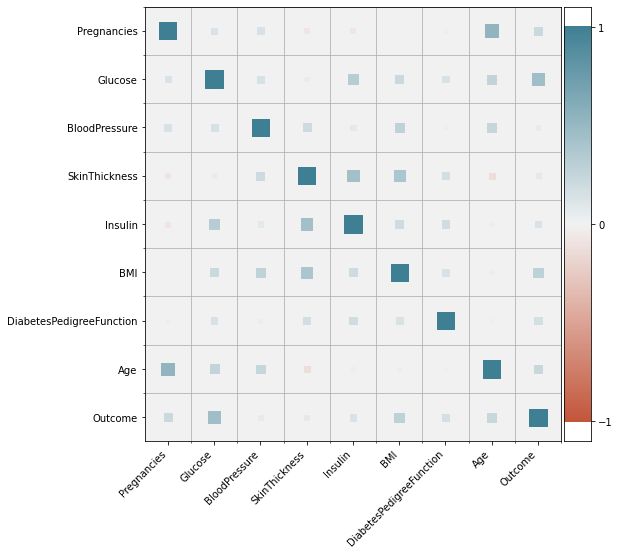

In [3]:
# type your code here
import seaborn

df = pd.read_csv('diabetes.csv')

# !pip install heatmapz
from heatmap import heatmap, corrplot
kor = df.corr()
plt.figure(figsize=(8,8))
corrplot(kor, size_scale=300)

#### Penjelasan 
Dari matriks korelasi diatas, semakin pekat warna hijau maka kedua variabel tersebut memiliki korelasi yang positif, semakin pekat warna merah maka kedua variabel memiliki korelasi yang negatif.

Dari matriks tersebut juga, digambarkan ukuran kuat dan lemah dari korelasi antar variabel, semakin besar square maka semakin besar pula tingkat kekuatan korelasinya, dan sebaliknya.

### Kasus 2: Stock Market Analysis (Soal 3 - 4)
Pada kasus ini, kita akan membandingkan beberapa parameter yang diturunkan dari data historis harga saham dari 3 perusahaan, yaitu Nasdaq, Nikkei dan Hang Seng. Data set dapat diunduh melalui [tautan ini](https://www.dl.dropboxusercontent.com/s/0wny6x5sio9nvap/stock_market.zip?dl=0).

### Soal 3 (30 poin)
Lakukanlah _trend analysis_ nilai _daily percentage change_ dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan melalui visualisasi data.
_Trend analysis_ dilakukan dengan menggunakan hubungan berikut:
![output%2011.png](https://www.dl.dropboxusercontent.com/s/dxmrm74ksz5l9v2/trend_analysis_fig.png?dl=0)

#### Code

<AxesSubplot:title={'center':'Grafi Daily Percentage Change'}, xlabel='Date'>

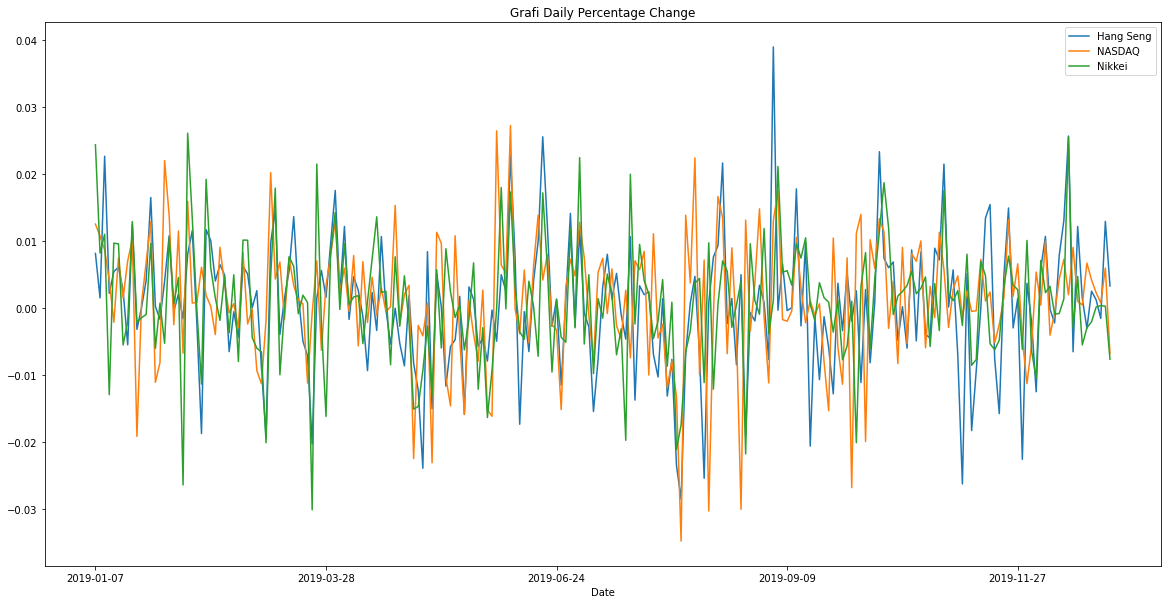

In [91]:
# type your code here
df_hs = pd.read_csv('Hang_Seng.csv')
df_na = pd.read_csv('Nasdaq.csv')
df_ni = pd.read_csv('Nikkei.csv')

# mengambil 2019
df_hs = df_hs.loc[(df_hs['Date'] > '2019-01-01') & (df_hs['Date'] <= '2019-12-31')]
df_na = df_na.loc[(df_na['Date'] > '2019-01-01') & (df_na['Date'] <= '2019-12-31')]
df_ni = df_ni.loc[(df_ni['Date'] > '2019-01-01') & (df_ni['Date'] <= '2019-12-31')]

# menghitung daily percentage change pada harga closing
df_hs['Change'] = df_hs.Close.pct_change()
df_na['Change'] = df_na.Close.pct_change()
df_ni['Change'] = df_ni.Close.pct_change()

# menjadikan satu df
df_hs = df_hs.set_index('Date')
df_na = df_na.set_index('Date')
df_ni = df_ni.set_index('Date')

hs = df_hs['Change']
na = df_na['Change']
ni = df_ni['Change']

df_ = pd.concat([hs,na,ni], axis='columns',join='inner')
df_.columns = ['Hang Seng','NASDAQ','Nikkei']
df_ = df_.pct_change().dropna()
df_saham.plot(figsize=(20,10),title='Grafi Daily Percentage Change')

In [88]:
print('Hang Seng:')
print('Max:',hs.max())
print('Min:',hs.min())
print('Mean:',hs.mean())
print('\nNASDAQ:')
print('Max:',na.max())
print('Min:',na.min())
print('Mean:',na.mean())
print('\nNIKKEI:')
print('Max:',ni.max())
print('Min:',ni.min())
print('Mean:',ni.mean())

Hang Seng:
Max: 0.03899195879190187
Min: -0.028978907182890312
Mean: 0.0005174836190144785

NASDAQ:
Max: 0.04260228405662558
Min: -0.0347360519227774
Mean: 0.0012333523407734672

NIKKEI:
Max: 0.026116981171018683
Min: -0.030065207912307823
Mean: 0.0008290666325366301


#### Penjelasan 
Untuk saham Hang Seng, selama tahun 2019 pernah mengalami perubahan maksimal perubahan per hari sebesar 0.03899 persen dimana merupakan Slight atau No Change, dan paling minimum sebesar -0.0289 yang termasuk Slight Negative Change. Total rata-rata perbedaan per hari memiliki  persentase 0.0005174 yang termasuk Slight Daily Percentage Change.

Untuk saham NASDAQ, selama tahun 2019 pernah mengalami perubahan maksimal perubahan per hari sebesar 0.0426 persen dimana merupakan Slight Change, dan paling minimum sebesar -0.0347 yang termasuk Slight Negative Change. Total rata-rata perbedaan per hari memiliki  persentase 0.001233 yang termasuk Slight atau No Daily Percentage Change.

Untuk saham Nikkei, selama tahun 2019 pernah mengalami perubahan maksimal perubahan per hari sebesar 0.0261 persen dimana merupakan Slight Change, dan paling minimum sebesar -0.03006 yang termasuk Slight  Change. Total rata-rata perbedaan per hari memiliki  persentase 0.000829 yang termasuk Slight atau No Percentage Change.

### Soal 4 (30 poin)
Lakukanlah analisis volatilitas dari ketiga harga saham tersebut selama tahun 2019, lalu tampilkan dan jelaskan hasil visualisasinya.

#### Code

<AxesSubplot:title={'center':'Retur harian'}, xlabel='Date'>

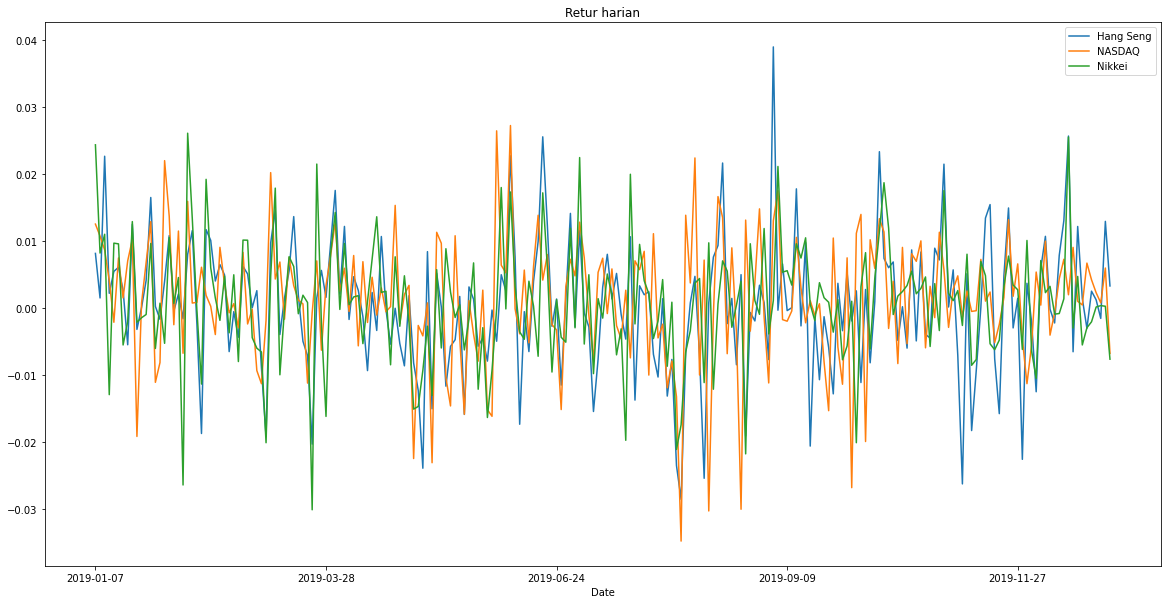

In [93]:
# type your code here
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
# !pip install --upgrade mplfinance
# from mpl_finance import candlestick_ohlc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_hs = pd.read_csv('Hang_Seng.csv')
df_na = pd.read_csv('Nasdaq.csv')
df_ni = pd.read_csv('Nikkei.csv')

# mengambil 2019
df_hs = df_hs.loc[(df_hs['Date'] > '2019-01-01') & (df_hs['Date'] <= '2019-12-31')]
df_na = df_na.loc[(df_na['Date'] > '2019-01-01') & (df_na['Date'] <= '2019-12-31')]
df_ni = df_ni.loc[(df_ni['Date'] > '2019-01-01') & (df_ni['Date'] <= '2019-12-31')]

# menghitung daily percentage change pada harga closing
df_hs['Change'] = df_hs.Close.pct_change()
df_na['Change'] = df_na.Close.pct_change()
df_ni['Change'] = df_ni.Close.pct_change()

df_hs = df_hs.set_index('Date')
df_na = df_na.set_index('Date')
df_ni = df_ni.set_index('Date')

hs = df_hs['Close']
na = df_na['Close']
ni = df_ni['Close']

df_saham = pd.concat([hs,na,ni], axis='columns',join='inner')
df_saham.columns = ['Hang Seng','NASDAQ','Nikkei']
df_saham = df_saham.pct_change().dropna()
df_saham.plot(figsize=(20,10),title='Retur harian')
# df_saham

<AxesSubplot:title={'center':'Retur kumulatif'}, xlabel='Date'>

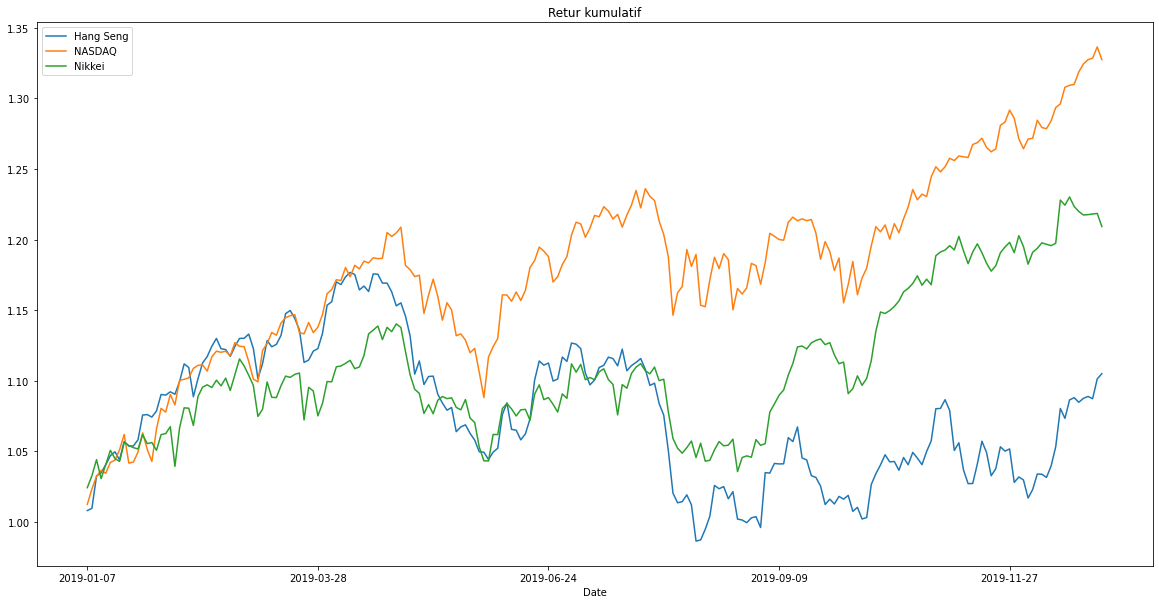

In [94]:
retur_kumulatif = (1+df_saham).cumprod()
retur_kumulatif.plot(figsize=(20,10), title='Retur kumulatif')

<AxesSubplot:title={'center':'2019 Standar Deviasi Berjangka'}, xlabel='Date'>

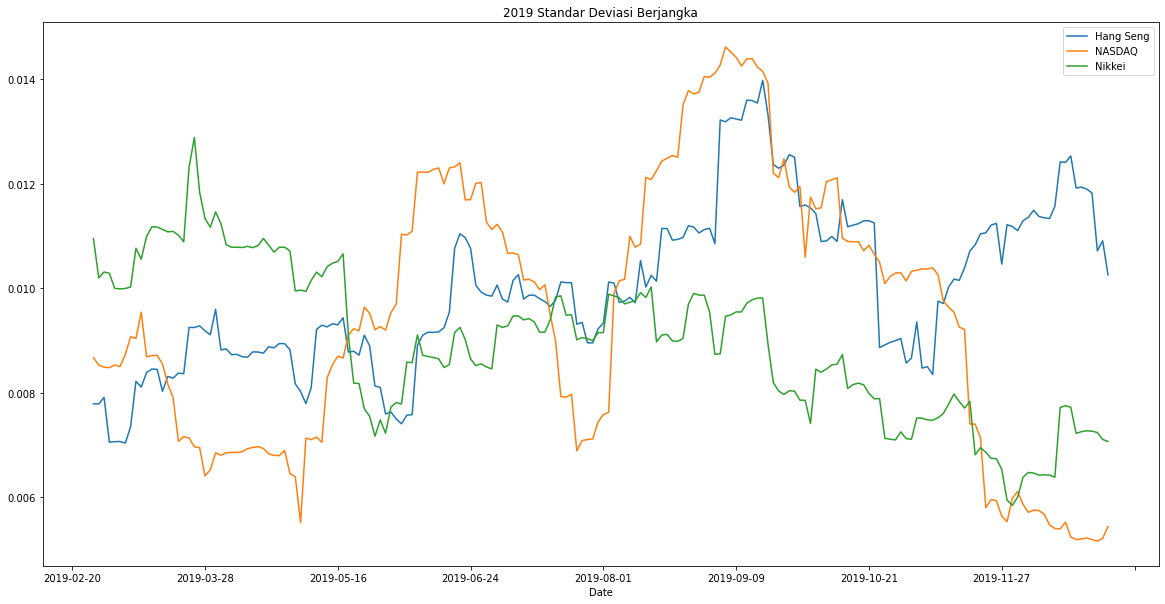

In [66]:
df_saham.rolling(window=30).std().plot(figsize=(20, 10), title="2019 Standar Deviasi Berjangka")

In [53]:
df_saham.std()

Hang Seng    0.010007
NASDAQ       0.009499
Nikkei       0.009076
dtype: float64

In [54]:
df_saham.std() * np.sqrt(252)

Hang Seng    0.158851
NASDAQ       0.150796
Nikkei       0.144079
dtype: float64

<AxesSubplot:title={'center':'Portfolio Resiko'}>

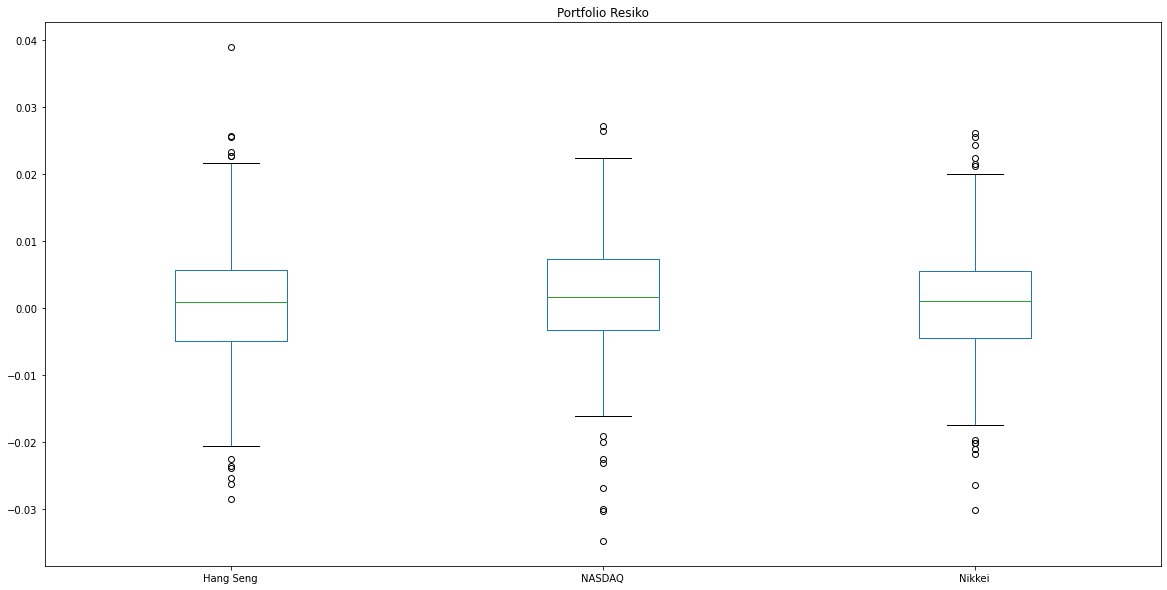

In [95]:
df_saham.plot.box(figsize=(20, 10), title="Portfolio Resiko")

#### Penjelasan 
Untuk penjelasan grafik pertama berjudul retur harian, terlihat bahwa saham milik NASDAQ merupakan yang paling volatile dari ketiganya, sedangkan yang paling least volatile adalah saham milik Nikkei.

Kemudian penjelasan grafik kedua berjudul retur kumulatif, pada akhir tahun 2019, NASDAQ memiliki nilai retur kumulatif tertinggi dengan perbedaan yang signifikan, diikuti Hang Seng dan Nikkei.

Dan untuk grafik selanjutnya, yaitu pada grafik 2019 Standar Deviasi Berjangka terlihat pada kuartal pertama, ditempati oleh Hang Seng sebagai saham yang paling volatile. Namun pada awal kuartal 2 dan 3 ditempati oleh NASDAQ dan di kuartal akhir ditempati oleh Nikkei.

Untuk grafik box plot, ditampilkan distribusi dari tiap nilai retur harian tiap-tiap saham. Kotak yang paling lebar dan paling panjang kumisnya adalah indikator saham yang paling volatile. Dari grafik tersebut dapat dikonfirmasi bahwa NASDAQ adalah yang paling volatile dari ketiganya, diikuti oleh Nikkei dan Hang Seng.
